<a href="https://colab.research.google.com/github/Jossent/Playground/blob/main/0101%20Udemy%20-%20Beginner%20Machine%20Learning%20in%20Python/03%20Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the dataset

In [2]:
import pandas as pd
dataset = pd.read_csv('data.csv')
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
X = dataset.iloc[:, :].values
X

## Using the elbow method to find the optimal number of clusters

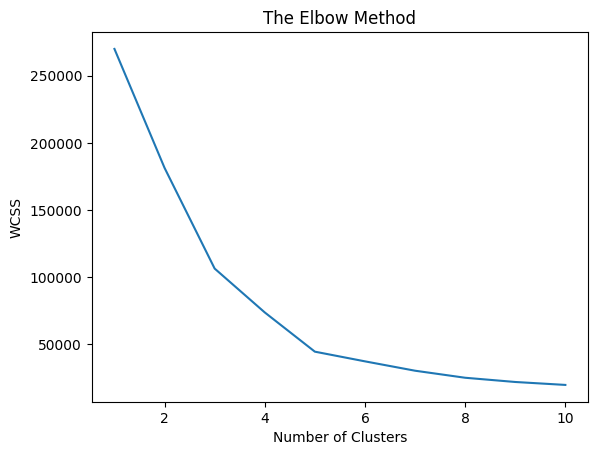

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


## Training the K-Means model on the dataset

In [8]:
model = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_pred = model.fit_predict(X)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Visualising the clusters

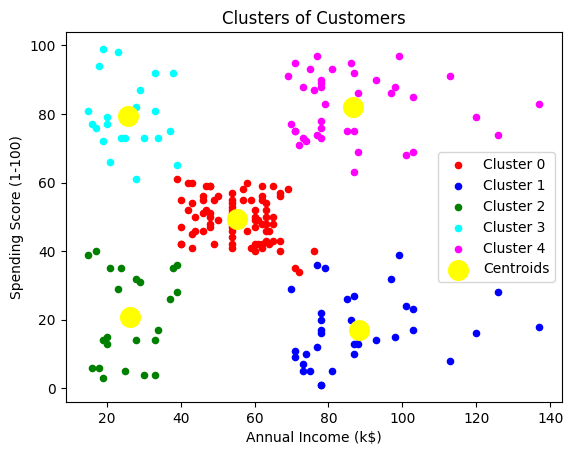

In [11]:
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=20, c='red', label="Cluster 0")
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=20, c='blue', label="Cluster 1")
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=20, c='green', label="Cluster 2")
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], s=20, c='cyan', label="Cluster 3")
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], s=20, c='magenta', label="Cluster 4")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='yellow', label="Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()